In [45]:
# Import packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Used for spliting trained and test data
from sklearn.linear_model import LinearRegression     # Used for LR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # Used for regreession matrics
 

# Read csv file (200 entries)
df = pd.read_csv('Placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in lpa)')

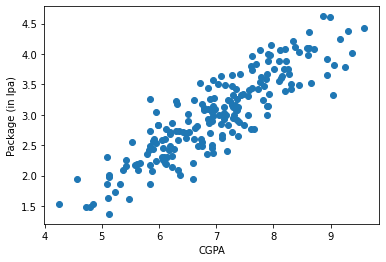

In [46]:
# Plot graph
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [94]:
# Seperate I/P and O/P columns
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [48]:
print(X)
print(y)

     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns]
0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [93]:
# select trained data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()

# Train data
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [51]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [92]:
# Predict result
y_predict = lr.predict(X_test)
y_predict

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [53]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

Text(0, 0.5, 'Package (in lpa)')

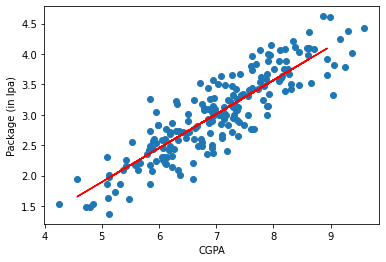

In [80]:
# Plot graph (Linear Regression Line)
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_test,lr.predict(X_test),color="red")
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [55]:
# Find slope
m = lr.coef_
# Find intercept
c = lr.intercept_

print(m)
print(c)

[0.55795197]
-0.8961119222429157


In [56]:
# Mean Absolute Error
print("MAE ",mean_absolute_error(y_test,y_predict))

MAE  0.2884710931878174


In [57]:
# Mean Squared Error
print("MSE ",mean_squared_error(y_test,y_predict))

MSE  0.12129235313495523


In [58]:
# Root Mean Squared Error
print("RMSE ",np.sqrt(mean_squared_error(y_test,y_predict)))

RMSE  0.3482705171773161


In [59]:
# R2 Score
print("R2Score ",r2_score(y_test,y_predict))

R2Score  0.7807301475103842


In [77]:
# Adjusted R2 Score
r2 = r2_score(y_test,y_predict)

r2_Adj = 1-((1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-1-X_test.shape[1]))
print("Adjusted R2Score",r2_Adj)

Adjusted R2Score 0.7749598882343417


In [110]:
# Add new column in old dataset
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)

new_df = new_df[['cgpa','random_feature','package']]
new_df.head()

,cgpa,random_feature,package
0,6.89,0.603208,3.26
1,5.12,0.955412,1.98
2,7.82,0.403280,3.25
3,7.42,0.676481,3.67
4,6.94,0.566556,3.57


Text(0, 0.5, 'Package (in lpa)')

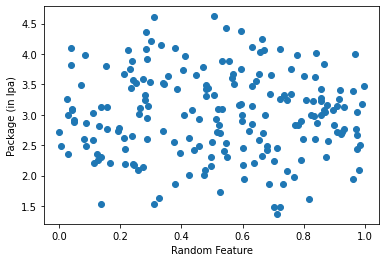

In [102]:
# Plot graph (Linear Regression Line)
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel('Random Feature')
plt.ylabel('Package (in lpa)')

In [103]:
# Seperate I/P and O/P columns
X = new_df.iloc[:,0:2]
y = new_df.iloc[:,-1]
print(X)
print(y)

     cgpa  random_feature
0    6.89        0.916763
1    5.12        0.769885
2    7.82        0.280927
3    7.42        0.569821
4    6.94        0.243056
..    ...             ...
195  6.93        0.602569
196  5.89        0.879752
197  7.21        0.744920
198  7.63        0.412398
199  6.22        0.663326

[200 rows x 2 columns]
0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [104]:
# select trained data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()

# Train data
lr.fit(X_train,y_train)

LinearRegression()

In [106]:
# Predict result
y_predict = lr.predict(X_test)
y_predict

array([3.93004945, 3.127294  , 2.36632647, 2.56275417, 1.64372164,
       1.75960631, 2.05399488, 2.96713457, 3.78167459, 2.91302977,
       4.10088263, 3.48021181, 2.96487823, 2.43255289, 3.16387041,
       3.48658006, 1.92876249, 3.24123575, 2.98568611, 3.42136221,
       2.5446514 , 3.15361935, 2.83524259, 3.10313249, 3.70450742,
       2.87159755, 3.51499125, 3.37289498, 3.93246456, 1.96125804,
       3.66576478, 3.24655304, 3.75606027, 2.75320429, 2.81069274,
       3.25522324, 3.51758771, 2.5893674 , 2.66456459, 2.73613712])

In [108]:
# R2 Score
print("R2Score ",r2_score(y_test,y_predict))

R2Score  0.7836658567525748


In [109]:
# Adjusted R2 Score
r2 = r2_score(y_test,y_predict)

r2_Adj = 1-((1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-1-X_test.shape[1]))
print("Adjusted R2Score",r2_Adj)

Adjusted R2Score 0.7719721192797411
